**Inferential Statistics - Week 4**

# Inference for Proportions

- Inference for proportions works with **categorical variables**.
- One categorical variable
  - Two levels: success-failure
  - More than two levels
- Two categorical variables
  - Two levels: success-failture
  - More than two levels

## Sampling Variability and CLT for Proportions

### Central Limit Theorem for a Proportion 

- When observations are independent and the sample size is sufficiently large, the sample proportion $\hat{p}$ will tend to follow a normal distribution with the following mean and standard error.

### Mean for a Proportion 

$$
\mu = p
$$

### Standard Error for a Proportion 

$$
SE = \sqrt{\frac{p(1-p)}{n}}
$$

### Conditions for Central Limit Theorem for a Proportion 

- Independence
- **Success-Failure Condition**: The sample size should be sufficiently large with $np \ge 10$ and $n(1-p) \ge 10$.


- If the success-failure condition is not met:
- The center of the sampling distribution will still be around the true population proportion.
- The spread of the sampling distribution can still be approximated using the same formula for the standard error.
- The shape of the distribution will depend on whether the true population proportion $p$ is closer to 0 or closer to 1.

**Example**

- 90% of all plant species are classified as angiosperms. These are flowering plants. 
- If you were to randomly sample 200 plants from the list of all known plant species, what is the probability that at least 95% of the plants in your sample will be flowering plants?

In [1]:
p = 0.9
n = 200
# P(p_hat > 0.95)?
p_hat = 0.95

In [3]:
# Check the conditions:
# 1. Random sampled + 10% of all plants -> Independent 
# 2. Success-failure condition
(n_success = n * 0.9)
(n_failure = n * (1-0.9))

[1] 180

[1] 20

In [7]:
(se = sqrt(p * (1-p) / n))
(z = (p_hat - p) / se)
(prob = pnorm(z, lower.tail = FALSE))

[1] 0.0212132

[1] 2.357023

[1] 0.009211063

- If you were to randomly sample 200 plants from the list of all known plant species, would it be considered unusual if 87.5% of the plants in a random sample of 200 were angiosperms?

In [8]:
# 0.875 is within 2 se from the sample mean,
# hence it is not unusual.
p_hat = 0.875
(z = (p_hat - p) / se)

[1] -1.178511

- What would you expect the shape of the sampling distribution of percentages of angiosperms in random samples of 50 plants to look like? (Remember, 90% of all plants species are classified as angiosperms.)

In [9]:
# The success-failture condition does not met
# as the number of failure is 5, which is smaller
# than 10. The shape of the sampling distribution
# will be strongly left skewed as p = 0.9.
(n_success = 50 * 0.9) 
(n_failture = 50 * 0.1)

[1] 45

[1] 5

## Confidence Interval for a Proportion 

### Confidence Interval for a Proportion 

$$
\text{CI} = \hat{p} \pm z^\star SE_{\hat{p}}
$$

### ME for a Proportion 

$$
\text{ME} = z^\star \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

- If we have the value of $\hat{p}$, we can use that in the calculation of the required sample size.
- If not, use $\hat{p} = 0.5$. 50-50 is a good guess. It
gives the most conservative estimate - highest possible sample size.

**Example**

- The general social survey found that 571 out of 670, that's roughly 85% of Americans, answered the question on experiment design correctly. 
- We are asked to estimate using a 95% confidence interval, the proportion of all Americans who have good intuition about experiment design.

In [20]:
n = 670
(p = 571/670)
(se = sqrt(p * (1-p) / n))
(me = 1.96 * se)
p - me; p + me
# We are 95% confident that 82.5% to 88.9% of all Americans
# have good intuition about experimental design.

[1] 0.8522388

[1] 0.01370956

[1] 0.02687073

[1] 0.8253681

[1] 0.8791095

- The margin of error for this previous confidence interval was 2.7%. If, for a new confidence interval based on a new sample, we wanted to reduce the margin of error to 1% while keeping the confidence level the same. At least how many respondents should we sample? 

In [21]:
# me = z * se
# me = z * sqrt(p * (1 - p) / n)
# n = (p * (1 - p)) / (me / z)^2
ceiling(p * (1 - p) / (0.01 / 1.96)^2)

[1] 4838

- If we wanted to estimate the percentage of Data Analysis and Statistical Inference students who have good intuition about experimental design using a 95% confidence interval and a margin of error no larger than 3%, at least how many students would we need to sample?

In [22]:
# me = z * sqrt(p * (1 - p) / n)
# n = (p * (1 - p)) / (me / z)^2
n = (0.5 * 0.5) / (0.03 / 1.96)^2
ceiling(n)

[1] 1068

## Hypothesis Test for a Proportion 

- When we check the success-failure condition for the convidence interval, we use the **observed proportion**.
- When we check the success-failure condition for doing a hypothesis test, we use the **expected proportion** (the null proportion).

### Hypothesis Testing for a Proportion 

$$
H_0: p = \text{null value}\\
H_A: p < or > or\ne \text{null value}
$$

**Example**

- A 2013 Pew Research poll found that 60% of 1,983 randomly sampled American adults believe in evolution. Does this provide convincing evidence that majority of Americans believe in evolution?

In [23]:
n = 1983
p = 0.5
p_hat = 0.6

# Randomly sampled + n < 10% of population -> independent
# Success-failure condition calculate with expected p (the null p) -> true
(success_failure = (n * p) > 10 & (n * (1 - p)) > 10)

# H0: p = 0.5
# HA: p > 0.5

(se = sqrt(p_hat * (1 - p_hat) / n))
(z = (p_hat - p) / se)
(pvalue = pnorm(z, lower.tail = FALSE))

# The p-value is significantly smaller than the significance level 0.05,
# hence reject null hypothesis and conclude that there is strong evidence
# convincing that the majority (> 0.5) of American adults believe in evolution.

# There is almost 0% chance of obtaining a random sample of 1,983 Americans where 60% or more believe in evolution, if in fact 50% of Americans believe 
# in evolution.

[1] TRUE

[1] 0.01100131

[1] 9.089829

[1] 4.959725e-20

## Estimating the Difference Between Two Proportions 

- To estimate the difference between two proportions, we label one of our categorical variables the **explanatory variable** and the other one our **response variable**.

### Standard Error for the Difference between Two Proportions 

$$
SE = \sqrt{
\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} +
\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}
} 
$$

### Confidence Interval for the Difference between Two Proportions 

$$
\text{CI} = (\hat{p}_1 - \hat{p}_2) \pm z^\star SE_{(\hat{p}_1 - \hat{p}_2)}
$$

### Conditions for Comparing two Independent Proportions 

- Independence
  - Within groups
    - Random sample / assignment
    - If sampling without replacement, n < 10% of population
  - Between groups
    - The two groups must be independent of each other (non-paired)
- Success-failure condition
  - Each sample should meet the success-failure condition

**Example**

- How do Coursera students and the American public at large compare with respect to their views on laws banning possession of handguns?

In [33]:
data.frame(
  `.` = c('US', 'Coursera'),
  suc = c(257, 59),
  n = c(1028, 84),
  p_hat = c(0.25, 0.71)
)

.,suc,n,p_hat
<fct>,<dbl>,<dbl>,<dbl>
US,257,1028,0.25
Coursera,59,84,0.71


In [26]:
p_c = 0.71
n_c = 84

p_us = 0.25
n_us = 1028

(se = sqrt(p_c*(1-p_c)/n_c + p_us*(1-p_us)/n_us))

(p = p_c - p_us)
p - 1.96 * se; p + 1.96 * se

[1] 0.05131845

[1] 0.46

[1] 0.3594158

[1] 0.5605842

- Based on the confidence interval we calculated, should we expect to find a significant difference (at the equivalent significance level) between the population proportions of Coursera students and the American public at large who believe there should be a law banning the possession of handguns?

In [27]:
# In this hypothesis test the null value for the difference
# between the two population proportions 
# would be 0, and 0 isn't in the interval, hence 
#we should expect to find a difference.

## Hypothesis Test for Comparing Two Proportions 

- Recall that when we check the success-failure condition for doing a hypothesis test, we use the **expected proportion** (the null proportion).
- But for doing a hypothesis test with two proportions, since the null value is $H0: p1 = p2$, we use the **pooled proportion**.

### Pooled Proportion 

$$
\begin{align}
\hat{p}_{pool} &= \frac{\text{total success}}{\text{total }n} \\
&= \frac{\text{# of success}_1 + \text{# of success}_2}
{n_1 + n_2}
\end{align}
$$

- The success-failure condition is thus $n_1 \hat{p}_{pool} \ge 10$, $n_1 (1 - \hat{p}_{pool}) \ge 10$, $n_2 \hat{p}_{pool} \ge 10$, $n_2 (1 - \hat{p}_{pool}) \ge 10$.

### Standard Error for Hypothesis Test for Comparing Two Proportions

$$
SE = \sqrt{
\frac{\hat{p}_{pool}(1-\hat{p}_{pool})}{n_1} +
\frac{\hat{p}_{pool}(1-\hat{p}_{pool})}{n_2}
} 
$$

**Example**

- Evaluate whether males and females are equally likely to answer "Yes" to the question about whether any of their children have ever been the victim of bullying.

In [32]:
data.frame(
  `.` = c('Male', 'Female'),
  yes = c(34, 61),
  no = c(52, 61),
  not_sure = c(4, 0),
  total = c(90, 122),
  p_hat = round(c(34/90, 61/122), 2)
)

.,yes,no,not_sure,total,p_hat
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,34,52,4,90,0.38
Female,61,61,0,122,0.50


In [29]:
# H0: p_male = p_female
# HA: p_male != p_female

p_male = 0.38
p_female = 0.50

n_male = 90
n_female = 122

(p_pool = (34 + 61) / (n_male + n_female))

conditions = n_male * p_pool >= 10 &
  n_male * (1 - p_pool) >= 10 &
  n_female * p_pool >= 10 &
  n_female * (1 - p_pool) >= 10

(p = p_male - p_female)

(se = sqrt(
  p_pool*(1-p_pool)/n_male + p_pool*(1-p_pool)/n_female
))

(z = (p - 0) / se)

(pvalue = pnorm(z) * 2)

[1] 0.4481132

[1] -0.12

[1] 0.06910121

[1] -1.736583

[1] 0.08246075

# Simulation Based Inference for Proportions and Chi-Square Testing 

## Small Sample Proportions

- When sample size is too small, the success-failure condition is not met.
- Hence, we cannot rely on the central limit theorem to do our inference.
- Under such circumstance, **simulation-based inference** comes to our rescue.


- The ultimate goal of a hypothesis test is a p-value.
- Inference via simulation devise a simulation scheme that assumes the null hypothesis is true.
- Repeat the simulation many times and record relevant sample statistic.
- Calculate p-value as the proportion of simulations that yield a result favorable to the alternative hypothesis.

**Example**

Paul the Octopus predicted 9 World Cup games, and predicted them all correctly. Does this provide convincing evidence that Paul actually has psychic powers? In other words, that he does better than just randomly guessing. 

In [15]:
library(statsr)
options(repr.plot.width = 10, repr.plot.height = 3)

Single proportion -- success: yes 
Summary statistics: p_hat = 1 ;  n = 8 
H0: p = 0.5 
HA: p > 0.5 
p-value =  0.0036 


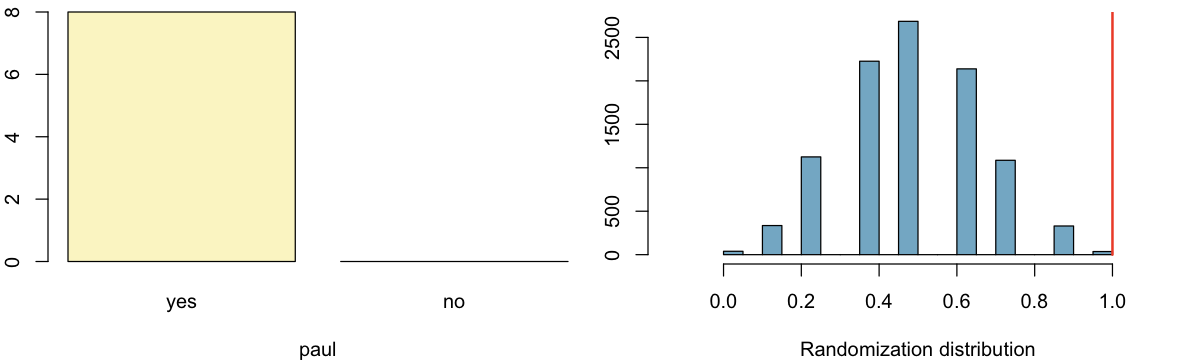

In [11]:
# H0: p = 0.5
# HA: p > 0.5
n = 8
p_hat = 1

# p_value = p(p_sim > 1 | p = 0.5)

paul = factor(
    c(rep("yes", 8), rep("no", 0)), 
    levels = c("yes", "no")
)
inference(
    paul, est = 'proportion', type = 'ht', method = 'simulation',
    success = 'yes', null = 0.5, alternative = 'greater'
)

**Example**

- There's a saying in English," to know something like the back of your hand", which means to know something very well. Myth Busters, a popular TV show, put to test the validity of the saying. They recruited 12 volunteers, each of whom were shown 10 pictures, of backs of their hands, while wearing gloves, so they couldn't actually see their own hands, and they were asked to identify their own hand among the ten pictures.
- Eleven out of twelve people completed the task successfully, meaning they were indeed able to recognize the backs of their own hands.
- What are the hypotheses for evaluating whether these data provide convincing evidence of the validity of the saying. In other words, that people do better than random guessing when it comes to recognizing the back of their own hand.

Single proportion -- success: correct 
Summary statistics: p_hat = 0.9167 ;  n = 12 
H0: p = 0.1 
HA: p > 0.1 
p-value =  0 


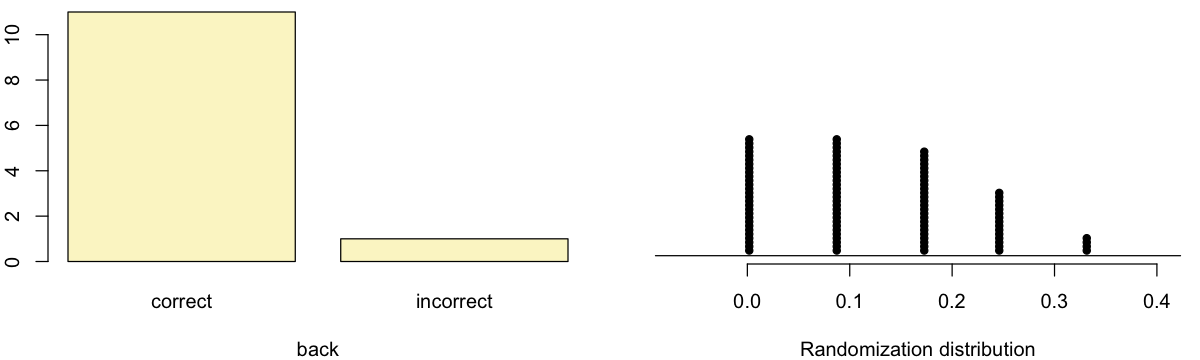

In [26]:
# H0: p = 0.1
# HA: p > 0.1

# 1. Use a *10-sided* fair die to represent the sampling 
# space, and call 1 a success, and all other outcomes
# failures.

# 2. Roll the die *12* times (each representing one of *12*
# people in the experiment), count the number rolls that resulted
# in *ones*, and calculate the proportion of correct guess in one
# simulation of *12* rolls.

# 3. Repeat step (2) 100 times, each time recording the proportion
# of simulated successes in a series of *12* rolls of the die.

# 4. Creat a dot plot of the *simulated* proportions from
# step (3) and count the number of simulations where the proportion
# is *11/12 or greater* (the *observed* proportion).

back = factor(
    c(rep("correct", 11), rep("incorrect", 1)),
    levels = c("correct", "incorrect")
)
inference(
    back, est = 'proportion', type = 'ht',
    success = 'correct', method = 'simulation',
    null = 0.1, alternative = 'greater', nsim = 100
)

# p_value = P(p_hat >= 0.9167 | p = 0.10)

## Comparing Two Small Sample Proportions

**Example**

- Do these data provide convincing evidence that there is a difference in how good people are at recognizing the backs and the palms of their hands? 

In [30]:
data.frame(
    `.` = c("back", "palm", "total"),
    correct = c(11, 7, 18),
    incorrect = c(1, 5, 6),
    total = c(12, 12, 24),
    p_hat = c(0.9167, 0.5833, 0.75)
)

.,correct,incorrect,total,p_hat
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
back,11,1,12,0.9167
palm,7,5,12,0.5833
total,18,6,24,0.7500


In [31]:
# H0: p_back - p_palm = 0
# HA: p_back - p_palm != 0

# 1. We have 24 trials so we can use 24 index cards, 
# where each card represents a subject or a guess at least. 

# 2. We mark 18 of the cards as correct and the 
# remaining six as wrong. 

# 3. We shuffle the cards and split them into two groups 
# of size 12 for back of the hand and palm of the hand. 

# 4. Then we calculate the difference between the proportions
# of quote unquote correct, in the back and palm decks and 
# record this number. 

# 5. Finally, we repeat steps three and four many, 
# many times to build our randomization distribution of 
# differences in simulated proportions.

## Chi-Square GOF Test

- Quantify how different the observed **counts** are from the expected counts.
- Large deviations from what would be expected base on sampling variation (chance) alone provide strong evidence for the alternative hypothesis.
- This is called a **goodness-of-fit** test since we're evaluating how well the observed data **fit** the expected distribution.

### Anatomy of a Test Statistic

$$
\frac{\text{point estimate} - \text{null value}}{\text{SE of point estimate}}
$$

### Chi-Square Statistic

- When dealing with counts and investigating how far the observed counts are from the expected counts, we use a new test statistic called the **chi-square $\chi^2$ statistc**.

$$
\chi^2 = \sum^k_{i=1} \frac{(O-E)^2}{E}
$$

- $O$: observed
- $E$: expected
- $k$: number of cells


- Why square?
- Positive standardized difference.
- Highly unusual differences between observed and expected will appear even more unusal.

### Conditions for Chi-Square Test

- **Independence**: Sample observations must be independent.
    - Random sample / assignment.
    - If sampling without replacement, n < 10% of polulation.
    - Each case only contributes to one cell in the table.
- **Sample Size**: Each particular scenario (e.g. cell) must have at least 5 expected cases.

**Example**

- In a county where jury selection is supposed to be random, a civil rights group sues the county, claiming racial disparities in jury selection. 
- Distribution of ethnicities of people in the county who are eligible for jury duty based on census results are given in this table.

In [36]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other'),
    percent_population = c(.8029, .1206, .0079, .0292, .0394)
)

ethnicity,percent_population
<fct>,<dbl>
white,0.8029
black,0.1206
nat_amer,0.0079
asian_pi,0.0292
other,0.0394


- We are also given the distribution of 2500 people who were selected for jury duty in the previous year.

In [37]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other'),
    n_observed = c(1920, 347, 19, 84, 130)
)

ethnicity,n_observed
<fct>,<dbl>
white,1920
black,347
nat_amer,19
asian_pi,84
other,130


- The court retains you as an independent expert to assess the statistical evidence that there was discrimination. You propose to formulate this issue as a hypothesis test.

In [38]:
# H0: People selected for jury duty are a simple random sample
# from the population of potential jurors. The observed counts
# of jurors from various race/ethnicities *follow the same*
# ethnicity *distribution* in the polulation.

# HA: People selected for jury duty are not a simple random sample
# from the population of potential jurors. The observed counts
# of jurors from various race/ethnicities *do not follow the same*
# ethnicity *distribution* in the polulation.

- Calculate expected number of jurors from each ehnicity if in fact the jury selection is random.

In [39]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [41]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other', 'total'),
    percent_population = c(.8029, .1206, .0079, .0292, .0394, 1)
) %>% mutate(n_expected = 2500 * percent_population)

ethnicity,percent_population,n_expected
<fct>,<dbl>,<dbl>
white,0.8029,2007.25
black,0.1206,301.50
nat_amer,0.0079,19.75
asian_pi,0.0292,73.00
other,0.0394,98.50
total,1.0000,2500.00
